In [290]:
import Stock_Prediction_Global_Parameters
from Stock_Prediction_Stateless_LSTM_Model import rnn_lstm_regression

In [291]:
# predict multiple tickers at the same time 

#paras = Stock_Prediction_Global_Parameters.SP_RNN_LSTM_Paras('lstm', 'AAPL')
if __name__ == "__main__":
    tks = ['AAPL']#['NDAQ','AAPL','GOOGL','FB','YHOO','YELP','AMZN','MSFT']
model = [0]*len(tks)
for tk in tks: 
    paras = Stock_Prediction_Global_Parameters.SP_RNN_LSTM_Paras('lstm', tk)

    paras.save = True
    paras.features = 'ohlcvC'
    paras.window_len = 120
    paras.pred_len = 10
    paras.valid_len = 20
    paras.out_type = 'MA'
    paras.start_date = '1980-01-01'
    # paras.end_date = 'current'

    paras.batch_size = 2000
    paras.epoch = 1
    paras.model['hidden_layers'] = [120, 60, 30]
    paras.model['dropout'] = [0.7, 0.5, 0.3]
    paras.model['activation'] = ['relu', 'relu', 'relu']
    paras.model['optimizer'] = 'rmsprop'

    # regression setting
    paras.out_class_type = 'regression'
    paras.n_out_class = 5  # ignore for regression
    paras.model['out_layer'] = 1
    paras.model['loss'] = 'mse'
    paras.model['out_activation'] = 'linear'

    # run
    #model[tk]= rnn_lstm_regression(paras)
    #model[tk].run()
    #model = 'lstm_' + str(tk)
    lstm = rnn_lstm_regression(paras)
    lstm.run()



Save Directory:  ./history/lstm_AAPL_2017-10-10 05:15:22_120_10_ohlcvC_1980-01-01_2017-10-10_[120, 60, 30]_[0.7, 0.5, 0.3]_['relu', 'relu', 'relu']/


KeyError: 'C'

In [74]:
pwd

'/home/xiangcheng/Documents/notebooks/US-Stock-Market-Prediction-by-LSTM'

In [111]:
# how to use the classification model 
import pandas as pd


df_vix = pd.read_csv('../VIX.csv')

In [117]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

#plt.plot(df_vix['VIX Close'].dropn
df_vix['VIX Close'].isnull().sum()

0

In [132]:
import quandl 

df_rate = quandl.get("FMAC/MORTG", authtoken="-Cd2GkPqwZYD7_NNFF4K")


,Value
Date,
2011-10-01,4.07
2011-11-01,3.99
2011-12-01,3.96
2012-01-01,3.92
2012-02-01,3.89
2012-03-01,3.95
2012-04-01,3.91
2012-05-01,3.80
2012-06-01,3.68


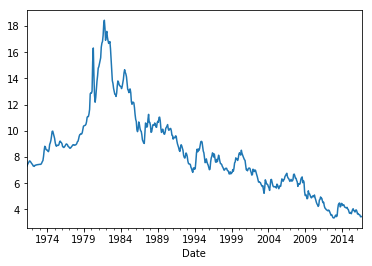

In [135]:
df_rate.Value.plot(kind = 'line')


In [195]:
ticker = 'AAPL'
stkname = "WIKI/" + str(ticker)
df = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                        end_date='2017-10-09')
df['date'] = df.index
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,date
Date,,,,,,,,,,,,,
2017-10-03,154.01,155.09,153.910,154.4800,16146388.0,0.0,1.0,154.01,155.09,153.910,154.4800,16146388.0,2017-10-03
2017-10-04,153.63,153.86,152.460,153.4508,19844177.0,0.0,1.0,153.63,153.86,152.460,153.4508,19844177.0,2017-10-04
2017-10-05,154.18,155.44,154.050,155.3900,21032800.0,0.0,1.0,154.18,155.44,154.050,155.3900,21032800.0,2017-10-05
2017-10-06,154.97,155.49,154.560,155.3000,16423749.0,0.0,1.0,154.97,155.49,154.560,155.3000,16423749.0,2017-10-06
2017-10-09,155.81,156.73,155.485,155.8400,16200129.0,0.0,1.0,155.81,156.73,155.485,155.8400,16200129.0,2017-10-09


In [137]:
df_combined.tail()

,Adj. Close,Adj. High,Adj. Low,Adj. Open,Adj. Volume,Close,Ex-Dividend,High,Low,Open,Split Ratio,Value,Volume
Date,,,,,,,,,,,,,
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.57,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.44,NaN
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.44,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.46,NaN


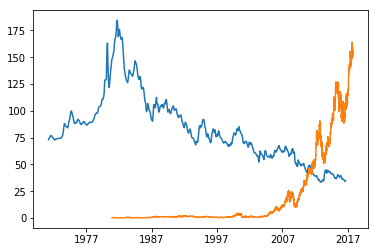

In [145]:
plt.plot(10*df_combined.Value)
plt.plot(df_combined['Adj. Close'])

In [147]:
import pandas as pd
#df = pd.read_table('data', sep='\s+')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df = df.pivot(index='month', columns='ticker')

start_date = df.index.min() - pd.DateOffset(day=1)
end_date = df.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
df = df.reindex(dates, method='ffill')

df = df.stack('ticker')
df = df.sortlevel(level=1)
df = df.reset_index()

,Value
Date,
2016-05-01,3.60
2016-06-01,3.57
2016-07-01,3.44
2016-08-01,3.44
2016-09-01,3.46


In [285]:
df_rate = quandl.get("FMAC/30US", authtoken="-Cd2GkPqwZYD7_NNFF4K")
start_date = df_rate.index.min() - pd.DateOffset(day=1)
end_date = df_rate.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
df_rate = df_rate.reindex(dates, method='ffill')
rate_columns = df_rate.columns
df_rate['date'] =df_rate.index
df_rate.columns

Index(['Value', 'date'], dtype='object')

In [196]:
df_combined = pd.merge(df, df_rate, on = 'date')

In [200]:
df_combined.tail(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,date,Value
9280,154.01,155.09,153.910,154.4800,16146388.0,0.0,1.0,154.01,155.09,153.910,154.4800,16146388.0,2017-10-03,3.83
9281,153.63,153.86,152.460,153.4508,19844177.0,0.0,1.0,153.63,153.86,152.460,153.4508,19844177.0,2017-10-04,3.83
9282,154.18,155.44,154.050,155.3900,21032800.0,0.0,1.0,154.18,155.44,154.050,155.3900,21032800.0,2017-10-05,3.85
9283,154.97,155.49,154.560,155.3000,16423749.0,0.0,1.0,154.97,155.49,154.560,155.3000,16423749.0,2017-10-06,3.85
9284,155.81,156.73,155.485,155.8400,16200129.0,0.0,1.0,155.81,156.73,155.485,155.8400,16200129.0,2017-10-09,3.85


In [203]:
df_vix_1 = quandl.get("CHRIS/CBOE_VX1", authtoken="-Cd2GkPqwZYD7_NNFF4K")
df_vix_1['date'] = df_vix_1.index
df_vix_1.tail()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest,date
Trade Date,,,,,,,,,,
2017-10-02,11.65,11.70,11.3,11.35,11.375,-0.30,108059.0,0.0,286387.0,2017-10-02
2017-10-03,11.40,11.50,11.3,11.40,11.375,0.00,74138.0,0.0,272655.0,2017-10-03
2017-10-04,11.40,11.50,11.3,11.35,11.325,-0.05,85926.0,0.0,259759.0,2017-10-04
2017-10-05,11.30,11.35,10.8,10.80,10.825,-0.50,100806.0,0.0,252007.0,2017-10-05
2017-10-06,10.85,11.28,10.8,10.85,10.825,0.00,123050.0,64.0,236880.0,2017-10-06


In [206]:
df_combined = pd.merge(pd.merge(df, df_rate,  on = 'date'), df_vix_1, on = 'date')
df_combined

,Open_x,High_x,Low_x,Close_x,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Value,Open_y,High_y,Low_y,Close_y,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
3092,154.26,154.45,152.72,153.8100,18524860.0,0.0,1.0,154.26,154.45,152.72,...,3.83,11.65,11.70,11.3,11.35,11.375,-0.30,108059.0,0.0,286387.0
3093,154.01,155.09,153.91,154.4800,16146388.0,0.0,1.0,154.01,155.09,153.91,...,3.83,11.40,11.50,11.3,11.40,11.375,0.00,74138.0,0.0,272655.0
3094,153.63,153.86,152.46,153.4508,19844177.0,0.0,1.0,153.63,153.86,152.46,...,3.83,11.40,11.50,11.3,11.35,11.325,-0.05,85926.0,0.0,259759.0
3095,154.18,155.44,154.05,155.3900,21032800.0,0.0,1.0,154.18,155.44,154.05,...,3.85,11.30,11.35,10.8,10.80,10.825,-0.50,100806.0,0.0,252007.0
3096,154.97,155.49,154.56,155.3000,16423749.0,0.0,1.0,154.97,155.49,154.56,...,3.85,10.85,11.28,10.8,10.85,10.825,0.00,123050.0,64.0,236880.0


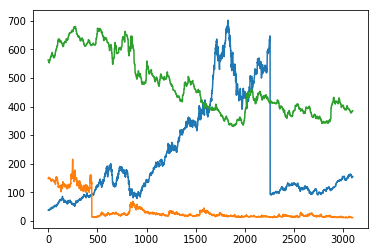

In [212]:
plt.plot(df_combined['Close_x'])
plt.plot(df_combined['Close_y'])
plt.plot(100*df_combined['Value'])

In [214]:
df_rate.tail()

,Value,date
date,,
2017-10-27,3.85,2017-10-27
2017-10-28,3.85,2017-10-28
2017-10-29,3.85,2017-10-29
2017-10-30,3.85,2017-10-30
2017-10-31,3.85,2017-10-31


In [275]:
ticker = 'GOOGL'
stkname = "WIKI/" + str(ticker)
df01 = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= start_date,
                        end_date= end_date)
df01 = df01[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df01 = df01.rename(columns={"Adj. Open": "open", "Adj. High": "high", "Adj. Low": "low",
                                "Adj. Close": "close", "Adj. Volume": "volume"})
df01['date'] = df01.index

df_rate = quandl.get("FMAC/30US", authtoken="-Cd2GkPqwZYD7_NNFF4K")
start_date = df_rate.index.min() - pd.DateOffset(day=1)
end_date = df_rate.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
df_rate = df_rate.reindex(dates, method='ffill')
rate_columns = df_rate.columns
df_rate['date'] =df_rate.index

df_vix_1 = quandl.get("CHRIS/CBOE_VX1", authtoken="-Cd2GkPqwZYD7_NNFF4K")
df_vix_1['date'] = df_vix_1.index

df = pd.merge(pd.merge(df01, df_rate,  on = 'date'), df_vix_1, on = 'date')


In [277]:
df['MA'] = df['close'].rolling(window=10, center=False).mean()
df['label'] = df['MA'].shift(-1 * 10)
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'date', 'Value', 'Open',
       'High', 'Low', 'Close', 'Settle', 'Change', 'Total Volume', 'EFP',
       'Prev. Day Open Interest', 'MA', 'label'],
      dtype='object')

In [248]:
featureset = list(['label'])
#featuresDict = {'c': 'close', 'h': 'high', 'l': 'low', 'o': 'open', 'v': 'volume'}
featuresDict = {'c': 'close', 'h': 'high', 'l': 'low', 'o': 'open', 'v': 'volume', 'V': 'Value', 
                        'O': 'Open', 'H': 'High', 'L': 'Low', 'C': 'Close', 'S': 'Settle', 'C': 'Change', 'T': 'Total Volume', 
                        'E': 'EFP'}
features = 'ohlcvVC'
for i in range(10, -1, -1):
    for j in list(features):
        df[j + '_-' + str(i) + '_d'] = df[featuresDict[j]].shift(1 * i)
        featureset.append(j + '_-' + str(i) + '_d')


In [262]:
df = df[featureset]
df_lately = df[-10:]
df.dropna(inplace=True)
df_valid = df[len(df) - 20: len(df)]
df = df[0:len(df) - 20]
df.head()

,label,o_-10_d,h_-10_d,l_-10_d,c_-10_d,v_-10_d,V_-10_d,C_-10_d,o_-9_d,h_-9_d,...,v_-1_d,V_-1_d,C_-1_d,o_-0_d,h_-0_d,l_-0_d,c_-0_d,v_-0_d,V_-0_d,C_-0_d
10,149.401639,138.467436,144.281383,136.285701,143.793878,42007300.0,5.63,148.3,144.536169,145.599452,...,18436700.0,5.53,-0.3,146.452084,148.448246,145.564343,148.312827,14973000.0,5.53,-1.5
11,150.428559,144.536169,145.599452,142.926199,144.365643,30234300.0,5.63,0.8,145.283476,146.612579,...,14973000.0,5.53,-1.5,149.110289,149.260754,146.141124,146.213848,15984500.0,5.53,0.8
12,151.351407,145.283476,146.612579,144.781928,145.097903,20927000.0,5.63,-0.5,144.445891,147.861434,...,15984500.0,5.53,0.8,145.143043,148.357967,144.701680,148.227564,21322800.0,5.62,1.1
13,151.660863,144.445891,147.861434,143.693568,145.303538,28084600.0,5.57,2.6,145.900380,149.461373,...,21322800.0,5.62,1.1,148.583664,149.210599,147.480257,148.573633,14900200.0,5.62,-2.4
14,151.786250,145.900380,149.461373,145.238337,149.085212,35506800.0,5.57,1.5,149.912766,152.706390,...,14900200.0,5.62,-2.4,148.658896,148.759205,145.960566,147.129174,16763800.0,5.62,0.3


In [269]:
default_list = ['open', 'high', 'low', 'close', 'volume', 'Value', 'Open', 'Close', 'High', 'Low', 'Total Volume']
original_other_list = set(df.columns) - set(default_list) 
original_other_list = list(original_other_list)
#df = df[default_list + original_other_list]


In [272]:
df.columns

Index(['label', 'o_-10_d', 'h_-10_d', 'l_-10_d', 'c_-10_d', 'v_-10_d',
       'V_-10_d', 'C_-10_d', 'o_-9_d', 'h_-9_d', 'l_-9_d', 'c_-9_d', 'v_-9_d',
       'V_-9_d', 'C_-9_d', 'o_-8_d', 'h_-8_d', 'l_-8_d', 'c_-8_d', 'v_-8_d',
       'V_-8_d', 'C_-8_d', 'o_-7_d', 'h_-7_d', 'l_-7_d', 'c_-7_d', 'v_-7_d',
       'V_-7_d', 'C_-7_d', 'o_-6_d', 'h_-6_d', 'l_-6_d', 'c_-6_d', 'v_-6_d',
       'V_-6_d', 'C_-6_d', 'o_-5_d', 'h_-5_d', 'l_-5_d', 'c_-5_d', 'v_-5_d',
       'V_-5_d', 'C_-5_d', 'o_-4_d', 'h_-4_d', 'l_-4_d', 'c_-4_d', 'v_-4_d',
       'V_-4_d', 'C_-4_d', 'o_-3_d', 'h_-3_d', 'l_-3_d', 'c_-3_d', 'v_-3_d',
       'V_-3_d', 'C_-3_d', 'o_-2_d', 'h_-2_d', 'l_-2_d', 'c_-2_d', 'v_-2_d',
       'V_-2_d', 'C_-2_d', 'o_-1_d', 'h_-1_d', 'l_-1_d', 'c_-1_d', 'v_-1_d',
       'V_-1_d', 'C_-1_d', 'o_-0_d', 'h_-0_d', 'l_-0_d', 'c_-0_d', 'v_-0_d',
       'V_-0_d', 'C_-0_d'],
      dtype='object')